<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Замена-типов-данных." data-toc-modified-id="Замена-типов-данных.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типов данных.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Подсчет-по-месяцам." data-toc-modified-id="Подсчет-по-месяцам.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подсчет по месяцам.</a></span></li><li><span><a href="#Анализ-пользователей-тарифа-ультра" data-toc-modified-id="Анализ-пользователей-тарифа-ультра-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ пользователей тарифа ультра</a></span></li><li><span><a href="#Анализ-пользователей-тарифа-смарт" data-toc-modified-id="Анализ-пользователей-тарифа-смарт-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ пользователей тарифа смарт</a></span></li></ul></li><li><span><a href="#Проверка-гипотез." data-toc-modified-id="Проверка-гипотез.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Целью проекта является анализ поведения клиентов телеком-компании и выбор оптимального тарифа. Для выполнения цели необходимо решить следующие задачи: <div>1. Посчитать для каждого пользователя по месяцам: количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика, помесячную выручку с каждого пользователя.
 <div>2. Анализ пользователей по тарифам.
<div>3. Сформулировать гипотезы о различии параметров пользователей на тарифах "Ультра" и "Смарт". Проверить гипотезы. 
<div>4. Сформулировать выводы. 
<div>Данные для работы предоставлены заказчиком. Они содержатся в отдельных файлах по пользователям, звонкам, сообщениям, интернет-трафику и тарифам. 

## Обзор данных
Импортируем необходимые библиотеки, загружаем данные в переменные.

In [1]:
import pandas as pd #импортируем pandas как pd
import numpy as np #импортируем библиотеку numpy
from matplotlib import pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

In [33]:
users = pd.read_csv('C:\\Users\\algol\\Downloads\\users.csv') # читаем файл users.csv
calls = pd.read_csv('C:\\Users\\algol\\Downloads\\calls.csv') # читаем файл calls.csv
messages = pd.read_csv('C:\\Users\\algol\\Downloads\\messages.csv') # читаем файл messages.csv
internet = pd.read_csv('C:\\Users\\algol\\Downloads\\internet.csv') # читаем файл internet.csv
tariffs = pd.read_csv('C:\\Users\\algol\\Downloads\\tariffs.csv') # читаем файл tariffs.csv


Для удобства зададим функции для получения информации о данных.

In [44]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма, 
#а также явных дубликатов
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    count_duplicates = df.duplicated().sum()
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing,
                                     'num_duplicates': count_duplicates})
    
    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', df_data.shape[0])
    print('Количество столбцов файла:', df_data.shape[1])
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках и явных дубликатах данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())

In [45]:
df_info(users)

Количество строк файла: 500
Количество столбцов файла: 8

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
user_id,"[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, ...]",int64,500
age,"[52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73, 71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48, 33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29, 27, 74, 22, 30, 75, 57, 35]",int64,58
churn_date,"[nan, 2018-10-05, 2018-12-18, 2018-11-21, 2018-10-03, 2018-10-14, 2018-12-09, 2018-12-11, 2018-12-26, 2018-08-31, 2018-12-03, 2018-12-23, 2018-11-07, 2018-12-16, 2018-12-20, 2018-11-30, 2018-12-21, 2018-08-17, 2018-09-02, 2018-10-04, 2018-11-13, 2018-11-22, 2018-10-28, 2018-11-26, 2018-11-27, 2018-11-16, 2018-10-27, 2018-12-30, 2018-09-27, 2018-12-25, 2018-12-14, 2018-12-24, 2018-09-26, 2018-10-25]",object,33
city,"[Краснодар, Москва, Стерлитамак, Новокузнецк, Набережные Челны, Ульяновск, Челябинск, Пермь, Тюмень, Самара, Санкт-Петербург, Иваново, Чебоксары, Омск, Уфа, Томск, Чита, Мурманск, Петрозаводск, Тверь, Екатеринбург, Махачкала, Вологда, Череповец, Ярославль, Сочи, Хабаровск, Ставрополь, Рязань, Улан-Удэ, Тула, Саратов, Ростов-на-Дону, Казань, Иркутск, Курск, Калуга, Якутск, Астрахань, Химки, Владикавказ, Волгоград, Саранск, Ижевск, Новосибирск, Брянск, Тольятти, Нижний Тагил, Орёл, Белгород, Воронеж, Волжский, Курган, Барнаул, Красноярск, Архангельск, Липецк, Кемерово, Киров, Сургут, Пенза, Магнитогорск, Нижний Новгород, Кострома, Владивосток, Тамбов, Балашиха, Севастополь, Калининград, Оренбург, Смоленск, Нижневартовск, Владимир, Новороссийск, Грозный, Подольск]",object,76
first_name,"[Рафаил, Иван, Евгений, Белла, Татьяна, Афанасий, Леонид, Юна, Рустэм, Василиса, Эдуард, Веселина, Варлам, Борис, Яков, Рузана, Марица, Мария, Матвей, Игнатий, Тала, Святослав, Людмила, Иулиан, Владислав, Рустем, Алексей, Мариетта, Лаврентий, Инна, Лия, Розалия, Анжелика, Изольда, Агнесса, Юрий, Михаил, Константин, Марианна, Иннокентий, Джемма, Екатерина, Милица, Лола, Габриель, Кристина, Павел, Ренальд, Луиза, Радислав, Динара, Лукий, Глеб, Тамара, Александр, Таира, Роза, Исак, Юзефа, Ким, Гордей, Эльза, Гектор, Андрей, Рафаэль, Фёдор, Харитон, Еремей, Всеволод, Софья, Авксентий, Виолетта, Ириней, Гелена, Ксения, Вера, Вениамин, Вероника, Даниэла, Алла, Элеонора, Аюна, Руслан, Онисим, Марта, Эльвира, Габриэль, Исаак, Милана, Арнольд, Маргарита, Рашид, Альберта, Дана, Олег, Альбин, Сабина, Яна, Анвар, Инара, ...]",object,246
last_name,"[Верещагин, Ежов, Абрамович, Белякова, Авдеенко, Горлов, Ермолаев, Березина, Пономарёв, Блинова, Кононов, Алёшко, Соловьев, Андреенко, Акинфьев, Алюшина, Сазонова, Аленникова, Золотов, Круглов, Костина, Тихонов, Трофимова, Мельникова, Антипов, Акинин, Бородин, Авдеев, Евсеев, Селезнев, Русанова, Тимофеев, Игнатьева, Бабушкина, Бондарев, Аракина, Андропова, Архипова, Денисова, Одинцов, Кравцов, Добрынин, Родионова, Рябов, Карасева, Александрова, Меркулова, Мясникова, Ларин, Аничкина, Сомова, Панов, Фёдоров, Платонова, Артемьев, Дьячкова, Глушков, Свиридов, Рудаков, Ситникова, Коршунов, Климова, Алфеева, Игнатова, Малахов, Абашкина, Демьянов, Кочетов, Селиванова, Чумаков, Андрейкин, Павловский, Никулин, Шарапов, Кольцова, Литвинов, Авроров, Игнатьев, Терехова, Малышев, Галкин, Спиридонова, Дорофеева, Аксёнов, Абалакова, Нечаева, Астафьева, Суслова, Амельченко, Лапина, Пугачева, Кабанова, Кулешова, Озерова, Сергеева, Красильников, Колобов, Королькова, Лобанова, Поляков, ...]",object,419
reg_d


Информация о пропусках и явных дубликатах данных:


,column_name,num_missing,percent_missing,num_duplicates
user_id,user_id,0,0.00,0
age,age,0,0.00,0
churn_date,churn_date,462,92.40,0
city,city,0,0.00,0
first_name,first_name,0,0.00,0
last_name,last_name,0,0.00,0
reg_date,reg_date,0,0.00,0
tariff,tariff,0,0.00,0



Первые пять строк таблицы:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [39]:
df_info(calls)

Количество строк файла: 202607
Количество столбцов файла: 4

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
user_id,"[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, ...]",int64,492
duration,"[0.0, 2.85, 13.8, 5.18, 18.31, 18.44, 5.03, 18.82, 2.02, 7.15, 9.13, 9.36, 4.08, 12.63, 4.46, 15.08, 8.37, 1.56, 9.85, 12.21, 14.38, 4.21, 10.75, 23.83, 11.11, 11.8, 7.88, 14.94, 1.62, 22.76, 6.84, 6.8, 1.45, 9.44, 6.36, 10.84, 7.72, 10.87, 6.66, 19.77, 6.21, 6.11, 0.31, 8.69, 2.25, 14.31, 6.48, 11.1, 9.57, 3.43, 0.34, 11.52, 12.93, 11.29, 4.63, 3.37, 2.5, 1.8, 3.78, 1.1, 5.8, 8.02, 10.25, 11.45, 1.02, 12.28, 23.84, 8.86, 5.06, 10.09, 3.47, 4.42, 10.05, 5.63, 9.88, 9.22, 0.33, 7.68, 14.01, 10.77, 12.61, 8.41, 3.27, 7.41, 16.76, 3.94, 2.03, 5.82, 3.73, 3.63, 6.88, 8.83, 3.0, 13.6, 5.11, 13.66, 0.13, 8.67, 1.12, 12.29, ...]",float64,2871
id,"[1000_0, 1000_1, 1000_2, 1000_3, 1000_4, 1000_5, 1000_6, 1000_7, 1000_8, 1000_9, 1000_10, 1000_11, 1000_12, 1000_13, 1000_14, 1000_15, 1000_16, 1000_17, 1000_18, 1000_19, 1000_20, 1000_21, 1000_22, 1000_23, 1000_24, 1000_25, 1000_26, 1000_27, 1000_28, 1000_29, 1000_30, 1000_31, 1000_32, 1000_33, 1000_34, 1000_35, 1000_36, 1000_37, 1000_38, 1000_39, 1000_40, 1000_41, 1000_42, 1000_43, 1000_44, 1000_45, 1000_46, 1000_47, 1000_48, 1000_49, 1000_50, 1000_51, 1000_52, 1000_53, 1000_54, 1000_55, 1000_56, 1000_57, 1000_58, 1000_59, 1000_60, 1000_61, 1000_62, 1000_63, 1000_64, 1000_65, 1000_66, 1000_67, 1000_68, 1000_69, 1000_70, 1000_71, 1000_72, 1000_73, 1000_74, 1000_75, 1000_76, 1000_77, 1000_78, 1000_79, 1000_80, 1000_81, 1000_82, 1000_83, 1000_84, 1000_85, 1000_86, 1000_87, 1000_88, 1000_89, 1000_90, 1000_91, 1000_92, 1000_93, 1000_94, 1000_95, 1000_96, 1000_97, 1000_98, 1000_99, ...]",object,202607
call_date,"[2018-07-25, 2018-08-17, 2018-06-11, 2018-09-21, 2018-12-15, 2018-11-02, 2018-10-18, 2018-08-22, 2018-09-15, 2018-08-15, 2018-05-28, 2018-07-05, 2018-09-29, 2018-12-11, 2018-07-27, 2018-08-11, 2018-08-02, 2018-06-15, 2018-12-04, 2018-08-20, 2018-09-25, 2018-07-21, 2018-08-27, 2018-08-25, 2018-12-12, 2018-07-19, 2018-11-14, 2018-12-26, 2018-12-02, 2018-10-08, 2018-09-23, 2018-10-09, 2018-05-25, 2018-06-13, 2018-10-25, 2018-12-29, 2018-07-12, 2018-11-20, 2018-06-05, 2018-10-13, 2018-06-26, 2018-07-14, 2018-07-20, 2018-12-01, 2018-06-17, 2018-10-24, 2018-11-26, 2018-09-19, 2018-05-30, 2018-12-21, 2018-12-23, 2018-07-03, 2018-10-04, 2018-09-16, 2018-11-21, 2018-10-28, 2018-08-29, 2018-08-13, 2018-07-18, 2018-06-03, 2018-09-03, 2018-08-14, 2018-11-01, 2018-05-26, 2018-11-23, 2018-09-30, 2018-11-09, 2018-08-01, 2018-06-18, 2018-10-20, 2018-11-07, 2018-08-04, 2018-09-06, 2018-10-27, 2018-10-15, 2018-10-26, 2018-11-18, 2018-07-30, 2018-10-06, 2018-12-17, 2018-08-24, 2018-09-28, 2018-07-06, 2018-06-02, 2018-09-02, 2018-12-10, 2018-11-03, 2018-07-28, 2018-09-27, 2018-12-24, 2018-07-29, 2018-12-18, 2018-10-16, 2018-10-07, 2018-11-12, 2018-07-23, 2018-08-26, 2018-09-07, 2018-09-14, 2018-07-15, ...]",object,365



Информация о пропусках данных:


,column_name,num_missing,percent_missing,num_duplicates
id,id,0,0.00,0
call_date,call_date,0,0.00,0
duration,duration,0,0.00,0
user_id,user_id,0,0.00,0



Первые пять строк таблицы:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [35]:
df_info(messages)

Количество строк файла: 123036
Количество столбцов файла: 3

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
user_id,"[1000, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1013, 1014, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050, 1051, 1052, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099, 1100, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112, 1113, ...]",int64,426
id,"[1000_0, 1000_1, 1000_2, 1000_3, 1000_4, 1000_5, 1000_6, 1000_7, 1000_8, 1000_9, 1000_10, 1000_11, 1000_12, 1000_13, 1000_14, 1000_15, 1000_16, 1000_17, 1000_18, 1000_19, 1000_20, 1000_21, 1000_22, 1000_23, 1000_24, 1000_25, 1000_26, 1000_27, 1000_28, 1000_29, 1000_30, 1000_31, 1000_32, 1000_33, 1000_34, 1000_35, 1000_36, 1000_37, 1000_38, 1000_39, 1000_40, 1000_41, 1000_42, 1000_43, 1000_44, 1000_45, 1000_46, 1000_47, 1000_48, 1000_49, 1000_50, 1000_51, 1000_52, 1000_53, 1000_54, 1000_55, 1000_56, 1000_57, 1000_58, 1000_59, 1000_60, 1000_61, 1000_62, 1000_63, 1000_64, 1000_65, 1000_66, 1000_67, 1000_68, 1000_69, 1000_70, 1000_71, 1000_72, 1000_73, 1000_74, 1000_75, 1000_76, 1000_77, 1000_78, 1000_79, 1000_80, 1000_81, 1000_82, 1000_83, 1000_84, 1000_85, 1000_86, 1000_87, 1000_88, 1000_89, 1000_90, 1000_91, 1000_92, 1000_93, 1000_94, 1000_95, 1000_96, 1000_97, 1000_98, 1000_99, ...]",object,123036
message_date,"[2018-06-27, 2018-10-08, 2018-08-04, 2018-06-16, 2018-12-05, 2018-06-20, 2018-11-19, 2018-10-29, 2018-06-25, 2018-12-18, 2018-05-30, 2018-07-06, 2018-08-20, 2018-10-30, 2018-09-14, 2018-08-28, 2018-06-29, 2018-07-07, 2018-05-29, 2018-05-28, 2018-08-15, 2018-07-29, 2018-12-07, 2018-12-25, 2018-10-31, 2018-07-30, 2018-11-05, 2018-12-15, 2018-12-04, 2018-06-30, 2018-12-22, 2018-10-02, 2018-08-29, 2018-09-09, 2018-07-19, 2018-09-04, 2018-07-15, 2018-10-25, 2018-12-08, 2018-06-01, 2018-06-12, 2018-12-21, 2018-10-07, 2018-08-30, 2018-06-04, 2018-10-01, 2018-06-22, 2018-10-12, 2018-10-15, 2018-10-24, 2018-09-20, 2018-08-22, 2018-09-17, 2018-08-27, 2018-07-26, 2018-06-05, 2018-11-16, 2018-09-06, 2018-11-26, 2018-11-18, 2018-09-21, 2018-07-11, 2018-07-16, 2018-11-08, 2018-07-25, 2018-09-13, 2018-08-13, 2018-12-31, 2018-06-10, 2018-06-28, 2018-09-18, 2018-10-11, 2018-12-12, 2018-07-12, 2018-09-01, 2018-07-23, 2018-09-22, 2018-08-17, 2018-09-29, 2018-07-22, 2018-06-18, 2018-06-14, 2018-12-10, 2018-11-29, 2018-11-21, 2018-12-28, 2018-11-30, 2018-08-31, 2018-06-26, 2018-07-21, 2018-11-15, 2018-10-06, 2018-06-13, 2018-12-29, 2018-11-10, 2018-08-24, 2018-11-07, 2018-09-19, 2018-08-10, 2018-07-08, ...]",object,364



Информация о пропусках данных:


,column_name,num_missing,percent_missing
id,id,0,0.00
message_date,message_date,0,0.00
user_id,user_id,0,0.00



Первые пять строк таблицы:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [40]:
df_info(internet)

Количество строк файла: 149396
Количество столбцов файла: 5

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
Unnamed: 0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]",int64,149396
user_id,"[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, ...]",int64,497
mb_used,"[112.95, 1052.81, 1197.26, 550.27, 302.56, 399.97, 540.08, 415.7, 505.4, 345.54, 385.14, 0.0, 375.87, 393.83, 180.64, 337.71, 459.28, 204.14, 658.1, 452.73, 336.96, 564.37, 723.38, 603.61, 53.18, 153.44, 951.38, 799.91, 923.89, 622.43, 577.19, 506.48, 571.41, 432.34, 533.64, 660.31, 1249.74, 747.58, 142.75, 575.19, 724.48, 558.38, 555.63, 546.02, 549.2, 197.93, 210.52, 629.12, 277.96, 628.41, 747.24, 1066.59, 272.46, 348.64, 350.4, 478.19, 10.23, 363.2, 293.41, 430.5, 714.4, 547.31, 763.86, 693.42, 1106.7, 740.21, 614.73, 425.2, 953.07, 395.08, 566.04, 400.85, 387.18, 283.62, 947.79, 1050.37, 499.48, 652.41, 616.04, 392.92, 230.05, 331.23, 716.61, 674.93, 395.12, 682.35, 570.03, 537.22, 113.32, 1364.05, 107.63, 250.35, 544.22, 568.45, 775.25, 318.88, 664.51, 891.71, 361.18, 248.53, ...]",float64,70003
id,"[1000_0, 1000_1, 1000_2, 1000_3, 1000_4, 1000_5, 1000_6, 1000_7, 1000_8, 1000_9, 1000_10, 1000_11, 1000_12, 1000_13, 1000_14, 1000_15, 1000_16, 1000_17, 1000_18, 1000_19, 1000_20, 1000_21, 1000_22, 1000_23, 1000_24, 1000_25, 1000_26, 1000_27, 1000_28, 1000_29, 1000_30, 1000_31, 1000_32, 1000_33, 1000_34, 1000_35, 1000_36, 1000_37, 1000_38, 1000_39, 1000_40, 1000_41, 1000_42, 1000_43, 1000_44, 1000_45, 1000_46, 1000_47, 1000_48, 1000_49, 1000_50, 1000_51, 1000_52, 1000_53, 1000_54, 1000_55, 1000_56, 1000_57, 1000_58, 1000_59, 1000_60, 1000_61, 1000_62, 1000_63, 1000_64, 1000_65, 1000_66, 1000_67, 1000_68, 1000_69, 1000_70, 1000_71, 1000_72, 1000_73, 1000_74, 1000_75, 1000_76, 1000_77, 1000_78, 1000_79, 1000_80, 1000_81, 1000_82, 1000_83, 1000_84, 1000_85, 1000_86, 1000_87, 1000_88, 1000_89, 1000_90, 1000_91, 1000_92, 1000_93, 1000_94, 1000_95, 1000_96, 1000_97, 1000_98, 1000_99, ...]",object,149396
session_date,"[2018-11-25, 2018-09-07, 2018-06-25, 2018-08-22, 2018-09-24, 2018-10-02, 2018-07-11, 2018-10-08, 2018-09-03, 2018-09-27, 2018-08-28, 2018-06-20, 2018-08-09, 2018-08-11, 2018-07-21, 2018-06-09, 2018-06-03, 2018-11-01, 2018-11-28, 2018-08-20, 2018-12-06, 2018-07-02, 2018-10-19, 2018-10-30, 2018-06-17, 2018-11-06, 2018-09-14, 2018-11-15, 2018-08-26, 2018-10-15, 2018-11-27, 2018-10-17, 2018-10-07, 2018-08-05, 2018-07-06, 2018-10-03, 2018-11-02, 2018-06-30, 2018-11-17, 2018-06-06, 2018-11-20, 2018-05-31, 2018-10-29, 2018-12-10, 2018-07-04, 2018-12-28, 2018-05-28, 2018-09-15, 2018-09-09, 2018-09-17, 2018-09-01, 2018-11-03, 2018-11-04, 2018-06-16, 2018-12-07, 2018-08-25, 2018-06-15, 2018-06-26, 2018-10-06, 2018-12-01, 2018-10-14, 2018-06-07, 2018-12-15, 2018-10-04, 2018-08-13, 2018-07-10, 2018-07-07, 2018-08-17, 2018-06-28, 2018-08-07, 2018-06-29, 2018-07-13, 2018-07-27, 2018-11-30, 2018-07-26, 2018-05-26, 2018-11-16, 2018-11-13, 2018-11-11, 2018-12-18, 2018-06-18, 2018-12-02, 2018-06-14, 2018-12-25, 2018-06-24, 2018-12-05, 2018-06-10, 2018-10-16, 2018-10-21, 2018-07-09, 2018-07-17, 2018-08-04, 2018-06-01, 2018-06-13, 2018-06-27, 2018-11-14, 


Информация о пропусках данных:


,column_name,num_missing,percent_missing,num_duplicates
Unnamed: 0,Unnamed: 0,0,0.00,0
id,id,0,0.00,0
mb_used,mb_used,0,0.00,0
session_date,session_date,0,0.00,0
user_id,user_id,0,0.00,0



Первые пять строк таблицы:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [41]:
df_info(tariffs)

Количество строк файла: 2
Количество столбцов файла: 8

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
messages_included,"[50, 1000]",int64,2
mb_per_month_included,"[15360, 30720]",int64,2
minutes_included,"[500, 3000]",int64,2
rub_monthly_fee,"[550, 1950]",int64,2
rub_per_gb,"[200, 150]",int64,2
rub_per_message,"[3, 1]",int64,2
rub_per_minute,"[3, 1]",int64,2
tariff_name,"[smart, ultra]",object,2



Информация о пропусках данных:


,column_name,num_missing,percent_missing,num_duplicates
messages_included,messages_included,0,0.00,0
mb_per_month_included,mb_per_month_included,0,0.00,0
minutes_included,minutes_included,0,0.00,0
rub_monthly_fee,rub_monthly_fee,0,0.00,0
rub_per_gb,rub_per_gb,0,0.00,0
rub_per_message,rub_per_message,0,0.00,0
rub_per_minute,rub_per_minute,0,0.00,0
tariff_name,tariff_name,0,0.00,0



Первые пять строк таблицы:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблицы содержат следующие столбцы:

    Таблица `users` (информация о пользователях):
<div>user_id — уникальный идентификатор пользователя
<div>first_name — имя пользователя
<div>last_name — фамилия пользователя
<div>age — возраст пользователя (годы)
<div>reg_date — дата подключения тарифа (день, месяц, год)
<div>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<div>city — город проживания пользователя
<div>tariff — название тарифного плана
    
    Таблица `calls` (информация о звонках):
<div>id — уникальный номер звонка
<div>call_date — дата звонка
<div>duration — длительность звонка в минутах
<div>user_id — идентификатор пользователя, сделавшего звонок
    
    Таблица `messages` (информация о сообщениях):
<div>id — уникальный номер сообщения
<div>message_date — дата сообщения
<div>user_id — идентификатор пользователя, отправившего сообщение
    
    Таблица `internet` (информация об интернет-сессиях):
<div>id — уникальный номер сессии
<div>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<div>session_date — дата интернет-сессии
<div>user_id — идентификатор пользователя
    
    Таблица `tariffs` (информация о тарифах):
<div>tariff_name — название тарифа
<div>rub_monthly_fee — ежемесячная абонентская плата в рублях
<div>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<div>messages_included — количество сообщений в месяц, включённых в абонентскую плату
<div>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<div>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<div>rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<div>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Предобработка данных.

### Замена типов данных.

<font color='black'><div>1. В разных датасетах разное количество строк (значений). Это правильно. В одном датасете количество значений в столбцах одинаковое, что говорит о том, что пропущенных значений нет. Также проверены методами isna и duplicated все датасеты на наличие пропусков и явных дубликатов. В столбце churn_date много пропущенных значений, но это значит, что только у 38 пользователей тариф прекратил действие.<div>2.В столбце call_date данные строчные. Необходимо заменить на тип "datetime". 

In [3]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


<font color='black'>Данные столбца calls['call_date'] приведены в нужный формат. 

In [5]:
#меняем тип данных в столбце message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


<font color='black'>Данные столбца message_date приведены в нужный формат. 

In [6]:
#меняем тип данных в столбце session_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


<font color='black'>Данные столбца session_date приведены в нужный формат. 

## Исследовательский анализ данных (EDA)

### Подсчет по месяцам.

In [7]:
#создадим столбец month в датасете calls
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
#округлим все продолжительности звонков в минутах до целых вверх, чтобы соблюсти условие "«Мегалайн» всегда округляет секунды до минут". 

calls['duration'] = calls['duration'].apply(np.ceil)
#подсчитаем для каждого абонента суммарную длительность звонков по месяцам
calls_per_month = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'sum')
calls_per_month.head(5)

duration
user_id month          
1000    5     159.00   
        6     172.00   
        7     340.00   
        8     408.00   
        9     466.00

In [8]:
#создадим столбец month в датасете messages
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
#подсчитаем для каждого абонента суммарное количество сообщений по месяцам
messages_per_month = messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
messages_per_month.head(5) 

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

In [9]:
#создадим столбец month в датасете internet
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
#подсчитаем для каждого абонента суммарное количество трафика израсходованного за месяц
internet_per_month = internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
#создадим столбец gb_used в датасете internet_per_mounth
internet_per_month['gb_used'] = internet_per_month['mb_used']/1024
#округлим месячный трафик в gb до целых вверх, чтобы соблюсти условие:
#"Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется 
#в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.". 
internet_per_month['gb_used'] = internet_per_month['gb_used'].apply(np.ceil)
internet_per_month.head(5)

mb_used  gb_used
user_id month                   
1000    5     2,253.49  3.00    
        6     23,233.77 23.00   
        7     14,003.64 14.00   
        8     14,055.93 14.00   
        9     14,568.91 15.00

In [10]:
#Объединяем таблицы с месячными статистиками
data_per_month = calls_per_month.merge(messages_per_month , on = ['user_id', 'month'], how = 'outer')
#Добавим статистику по трафику таблицы с месячными статистиками
data_per_month = data_per_month.merge(internet_per_month, on = ['user_id', 'month'], how = 'outer').reset_index()
data_per_month.head(5)

,user_id,month,duration,id,mb_used,gb_used
0,1000,5,159.00,22.00,"2,253.49",3.00
1,1000,6,172.00,60.00,"23,233.77",23.00
2,1000,7,340.00,75.00,"14,003.64",14.00
3,1000,8,408.00,81.00,"14,055.93",14.00
4,1000,9,466.00,57.00,"14,568.91",15.00


In [11]:
#Присоединим город и тарифный план
data_per_month = data_per_month.merge(users[['user_id', 'city', 'tariff']], on = 'user_id', how = 'outer')
data_per_month.head(5)
#display(data_per_month['duration'].sum(),calls['duration'].sum())

,user_id,month,duration,id,mb_used,gb_used,city,tariff
0,1000,5.00,159.00,22.00,"2,253.49",3.00,Краснодар,ultra
1,1000,6.00,172.00,60.00,"23,233.77",23.00,Краснодар,ultra
2,1000,7.00,340.00,75.00,"14,003.64",14.00,Краснодар,ultra
3,1000,8.00,408.00,81.00,"14,055.93",14.00,Краснодар,ultra
4,1000,9.00,466.00,57.00,"14,568.91",15.00,Краснодар,ultra


In [12]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
#посчитаем помесячную выручку для каждого пользователя тарифа ультра
#сделаем срез со строками для тарифа ультра
sample_ultra = data_per_month[data_per_month['tariff'] == 'ultra']
#создадим столбец с перерасходом для звонков
sample_ultra['call_over_lim'] = sample_ultra['duration']-tariffs.loc[1,'minutes_included']
#уберем отрицательные значения из столбца и заменим их нулями
for index in range(len(sample_ultra)):
    sample_ultra['call_over_lim'][sample_ultra['call_over_lim'] < 0] = 0
#создадим столбец с перерасходом для сообщений
sample_ultra['message_over_lim'] = sample_ultra['id']-tariffs.loc[1,'messages_included']
#уберем отрицательные значения из столбца и заменим их нулями
for index in range(len(sample_ultra)):
    sample_ultra['message_over_lim'][sample_ultra['message_over_lim'] < 0] = 0   
#создадим столбец с перерасходом для интернет трафика
sample_ultra['gb_over_lim'] = sample_ultra['gb_used']-tariffs.loc[1,'mb_per_month_included']/1024
#уберем отрицательные значения из столбца и заменим их нулями
for index in range(len(sample_ultra)):
    sample_ultra['gb_over_lim'][sample_ultra['gb_over_lim'] < 0] = 0       
#создадим столбец с выручкой
sample_ultra['proceeds'] = (sample_ultra['call_over_lim']*tariffs.loc[1,'rub_per_minute'] + 
                            sample_ultra['message_over_lim']*tariffs.loc[1,'rub_per_message']+
                            sample_ultra['gb_over_lim']*tariffs.loc[1,'rub_per_gb']+ 
                            tariffs.loc[1,'rub_monthly_fee'])
sample_ultra.head(5)

,user_id,month,duration,id,mb_used,gb_used,city,tariff,call_over_lim,message_over_lim,gb_over_lim,proceeds
0,1000,5.00,159.00,22.00,"2,253.49",3.00,Краснодар,ultra,0.00,0.00,0.00,"1,950.00"
1,1000,6.00,172.00,60.00,"23,233.77",23.00,Краснодар,ultra,0.00,0.00,0.00,"1,950.00"
2,1000,7.00,340.00,75.00,"14,003.64",14.00,Краснодар,ultra,0.00,0.00,0.00,"1,950.00"
3,1000,8.00,408.00,81.00,"14,055.93",14.00,Краснодар,ultra,0.00,0.00,0.00,"1,950.00"
4,1000,9.00,466.00,57.00,"14,568.91",15.00,Краснодар,ultra,0.00,0.00,0.00,"1,950.00"


In [14]:
#посчитаем помесячную выручку для каждого пользователя тарифа смарт
#сделаем срез со строками для тарифа смарт
sample_smart = data_per_month[data_per_month['tariff'] == 'smart']
#создадим столбец с перерасходом для звонков
sample_smart['call_over_lim'] = sample_smart['duration']-tariffs.loc[0,'minutes_included']
#уберем отрицательные значения из столбца и заменим их нулями
for index in range(len(sample_smart)):
    sample_smart['call_over_lim'][sample_smart['call_over_lim'] < 0] = 0
#создадим столбец с перерасходом для сообщений
sample_smart['message_over_lim'] = sample_smart['id']-tariffs.loc[0,'messages_included']
#уберем отрицательные значения из столбца и заменим их нулями
for index in range(len(sample_smart)):
    sample_smart['message_over_lim'][sample_smart['message_over_lim'] < 0] = 0   
#создадим столбец с перерасходом для интернет трафика
sample_smart['gb_over_lim'] = sample_smart['gb_used']-tariffs.loc[0,'mb_per_month_included']/1024
#уберем отрицательные значения из столбца и заменим их нулями
for index in range(len(sample_smart)):
    sample_smart['gb_over_lim'][sample_smart['gb_over_lim'] < 0] = 0       
#создадим столбец с выручкой
sample_smart['proceeds'] = (sample_smart['call_over_lim']*tariffs.loc[0,'rub_per_minute'] + 
                            sample_smart['message_over_lim']*tariffs.loc[0,'rub_per_message']+
                            sample_smart['gb_over_lim']*tariffs.loc[0,'rub_per_gb']+ 
                            tariffs.loc[0,'rub_monthly_fee'])
sample_smart.head(5)

,user_id,month,duration,id,mb_used,gb_used,city,tariff,call_over_lim,message_over_lim,gb_over_lim,proceeds
8,1001,11.00,430.00,NaN,"18,429.34",18.00,Москва,smart,0.00,NaN,3.00,NaN
9,1001,12.00,414.00,NaN,"14,036.66",14.00,Москва,smart,0.00,NaN,0.00,NaN
10,1002,6.00,117.00,4.00,"10,856.82",11.00,Стерлитамак,smart,0.00,0.00,0.00,550.00
11,1002,7.00,214.00,11.00,"17,580.10",18.00,Стерлитамак,smart,0.00,0.00,3.00,"1,150.00"
12,1002,8.00,289.00,13.00,"20,319.26",20.00,Стерлитамак,smart,0.00,0.00,5.00,"1,550.00"


In [15]:
#Объединим таблицы с обоими тарифами
data =pd.concat([sample_smart,sample_ultra],axis=0)
data


,user_id,month,duration,id,mb_used,gb_used,city,tariff,call_over_lim,message_over_lim,gb_over_lim,proceeds
8,1001,11.00,430.00,NaN,"18,429.34",18.00,Москва,smart,0.00,NaN,3.00,NaN
9,1001,12.00,414.00,NaN,"14,036.66",14.00,Москва,smart,0.00,NaN,0.00,NaN
10,1002,6.00,117.00,4.00,"10,856.82",11.00,Стерлитамак,smart,0.00,0.00,0.00,550.00
11,1002,7.00,214.00,11.00,"17,580.10",18.00,Стерлитамак,smart,0.00,0.00,3.00,"1,150.00"
12,1002,8.00,289.00,13.00,"20,319.26",20.00,Стерлитамак,smart,0.00,0.00,5.00,"1,550.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1473,9.00,NaN,19.00,"17,289.85",17.00,Красноярск,ultra,NaN,0.00,0.00,NaN
3206,1473,10.00,NaN,20.00,"13,688.65",14.00,Красноярск,ultra,NaN,0.00,0.00,NaN
3207,1473,11.00,NaN,14.00,"21,673.80",22.00,Красноярск,ultra,NaN,0.00,0.00,NaN
3208,1473,12.00,NaN,20.00,"18,418.26",18.00,Красноярск,ultra,NaN,0.00,0.00,NaN


### Анализ пользователей тарифа ультра

Text(0.5, 0, 'duration(минут)')

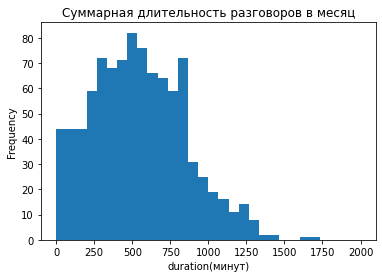

In [16]:
#Построим распределение суммарной длительности разговоров в месяц
sample_ultra['duration'].plot(kind ='hist', title = 'Cуммарная длительность разговоров в месяц', bins = 30, 
                              range = (0, 2000))
plt.xlabel('duration(минут)')

In [17]:
mean = sample_ultra['duration'].mean()
variance = np.var(sample_ultra['duration'])
standard_deviation = np.std(sample_ultra['duration'])
display(mean, variance, standard_deviation)

545.4511041009464

94104.36117385981

306.7643414314314

<font color='black'> В большинстве случаев люди за месяц наговаривают от 250 до 1000 минут. Среднее значение составляет 545 минут со стандартным отклонением 306 минут. 

Text(0.5, 0, 'Количество сообщений в месяц')

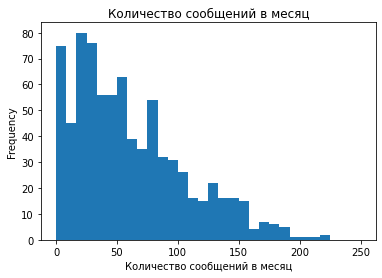

In [18]:
#Построим распределение суммарного количества сообщений в месяц
sample_ultra['id'].plot(kind ='hist', title = 'Количество сообщений в месяц', bins = 30, 
                              range = (0, 250))
plt.xlabel('Количество сообщений в месяц')

In [19]:
mean = sample_ultra['id'].mean()
variance = np.var(sample_ultra['id'])
standard_deviation = np.std(sample_ultra['id'])
display(mean, variance, standard_deviation)

61.161006289308176

2107.0055235156874

45.902129836377824

<font color='black'> В большинстве случаев люди за месяц отправляют до 100 сообщений. Среднее значение составляет 61 сообщение со стандартным отклонением 45 сообщений. 

Text(0.5, 0, 'Трафик в месяц, Гб')

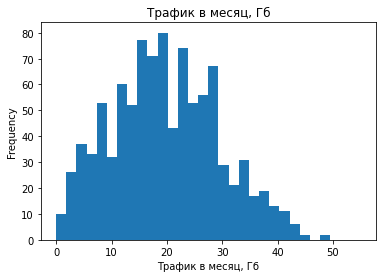

In [20]:
#Построим распределение суммарного количества трафика в месяц
sample_ultra['gb_used'].plot(kind ='hist', title = 'Трафик в месяц, Гб', bins = 30, 
                              range = (0, 55))
plt.xlabel('Трафик в месяц, Гб')

In [21]:
mean = sample_ultra['gb_used'].mean()
variance = np.var(sample_ultra['gb_used'])
standard_deviation = np.std(sample_ultra['gb_used'])
display(mean, variance, standard_deviation)

19.694358974358973

94.0501733070347

9.697946860394456

<font color='black'> Распределение пользования интернетом больше похоже на нормальное по сравнению со звонками и сообщениями. Наиболее часто встречающееся количество потребленных гигабайт лежит в диапазоне от 15 до 30 Гб.Среднее значение составляет 20 Гб со стандартным отклонением 10 Гб. 

### Анализ пользователей тарифа смарт

Text(0.5, 0, 'duration(минут)')

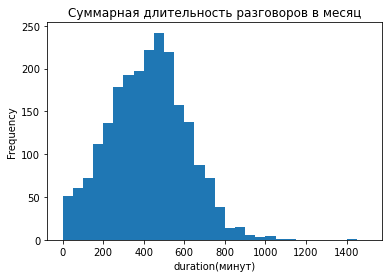

In [22]:
#Построим распределение суммарной длительности разговоров в месяц
sample_smart['duration'].plot(kind ='hist', title = 'Cуммарная длительность разговоров в месяц', bins = 30, 
                              range = (0, 1500))
plt.xlabel('duration(минут)')

In [23]:
mean = sample_smart['duration'].mean()
variance = np.var(sample_smart['duration'])
standard_deviation = np.std(sample_smart['duration'])
display(mean, variance, standard_deviation)

419.0629779577148

35828.06530953038

189.28302963955954

<font color='black'> Для тарифа смарт количество наговоренных минут меньше. Распределение похоже на нормальное, скошенное влево. Среднее значение составляет 419 минут со стандартным отклонением 189 минут. 

Text(0.5, 0, 'Количество сообщений в месяц')

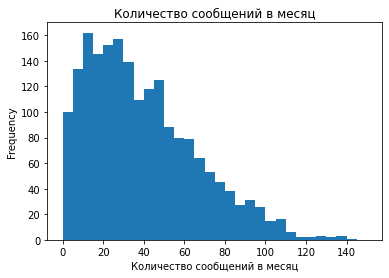

In [24]:
#Построим распределение суммарного количества сообщений в месяц
sample_smart['id'].plot(kind ='hist', title = 'Количество сообщений в месяц', bins = 30, 
                              range = (0, 150))
plt.xlabel('Количество сообщений в месяц')

In [25]:
mean = sample_smart['id'].mean()
variance = np.var(sample_smart['id'])
standard_deviation = np.std(sample_smart['id'])
display(mean, variance, standard_deviation)

38.71644120707596

717.220843110225

26.78097912904278

<font color='black'> Как и в случае с тарифом ультра, большинство в месяц отправляет менее 100 сообщений. Среднее значение составляет 38 сообщений со стандартным отклонением 26 сообщений. 

Text(0.5, 0, 'Трафик в месяц, Гб')

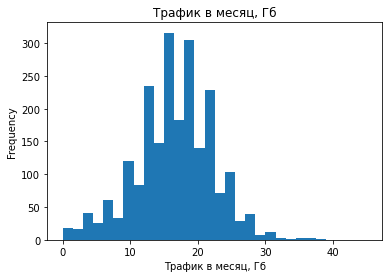

In [26]:
#Построим распределение суммарного количества трафика в месяц
sample_smart['gb_used'].plot(kind ='hist', title = 'Трафик в месяц, Гб', bins = 30, 
                              range = (0, 45))
plt.xlabel('Трафик в месяц, Гб')

In [27]:
mean = sample_smart['gb_used'].mean()
variance = np.var(sample_smart['gb_used'])
standard_deviation = np.std(sample_smart['gb_used'])
display(mean, variance, standard_deviation)

16.33617594254937

32.90897855432256

5.7366347760967455

<font color='black'> Распределение пользования интернетом является нормальным. Наиболее часто встречающееся количество потребленных гигабайт лежит в диапазоне от 15 до 25 Гб. Пик распределения для тарифа смарт лежит левее, чем для тарифа ультра, что говорит о меньшем потреблении трафика, пользователями с тарифом смарт.Среднее значение составляет 16 Гб со стандартным отклонением 6 Гб. 

## Проверка гипотез.

In [28]:
#Посчитаем среднюю выручку тарифа ультра
ultra_mean = sample_ultra['proceeds'].mean()
ultra_mean
#Посчитаем среднюю выручку тарифа смарт
smart_mean = sample_smart['proceeds'].mean()
display(ultra_mean, smart_mean)

2048.936170212766

1290.6778067885118

<font color='black'>Формируем нулевую гипотезу о равенстве средних выручек для тарифов ультра и смарт. Альтернативная гипотеза является двусторонней и предполагает, что выручки не равны. Считаем, что генеральные совокупности независимы. Поэтому применяем метод st.ttest_ind. 

In [29]:
#сделаем выборку строк для тарифа ультра где выручка не равна NaN.
sample1 = sample_ultra.query("proceeds != 'NaN'")
#сделаем выборку строк для тарифа смарт где выручка не равна NaN.
sample2 = sample_smart.query("proceeds != 'NaN'")

alpha = .05 # критический уровень статистической значимости, используем именно 5%, как наиболее распространенный.
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample1['proceeds'], 
    sample2['proceeds'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу


<font color='black'>Полученная вероятность меньше критического уровня, поэтому средние выручки тарифов ультра и смарт не равны. 

<font color='black'>Формируем нулевую гипотезу о равенстве средних выручек для Москвы и регионов. Альтернативная гипотеза предполагает, что выручки не равны. Считаем, что генеральные совокупности независимы, поэтому применяем метод st.ttest_ind.

In [30]:
#сделаем выборку строк всего датасета где выручка не равна NaN.
sample = data.query("proceeds != 'NaN'")
#сделаем выборку строк для регионов кроме Москвы.
sample_1 = sample.query("city != 'Москва'")

#сделаем выборку строк для Москвы.
sample_2 = sample.query("city == 'Москва'")

alpha = .05 # критический уровень статистической значимости, используем именно 5%, как наиболее распространенный. 
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_1['proceeds'], 
    sample_2['proceeds'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу


<font color='black'>Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Выводы. 

<font color='black'>1. Пользователи тарифа ультра в среднем дольше разговаривают по телефону, отсылают больше сообщений и тратят больше трафика. <div>2. Различия по выручке между Москвой и регионами в ходе исследования подтвердить не удалось. <div>3. Наиболее перспективным является тариф ультра, т.к. он имеет большую среднюю выручку по сравнению с тарифом смарт.  